<h1><center>Predicting Outcomes of US Supreme Court Oral Arguments</center></h1>
<h1 style="margin-top: -15px; margi-bottom: 10px;"><center>Final Report</center></h1>

## Project and Team Information
**Team members:** Federico Dominguez, Jessup Jong, Chanteria Milner, and Michael Plunkett \
**Project repository:** [Link](https://github.com/michplunkett/supreme-court-ml-predictions) \
**Project information:** The project uses historic United States Supreme Court cases to train natural language processing models to predict case rulings. 

## Table of Contents



Introduction

- Abstract

- Significance


Data and Feature Engineering:

- Filtering (5 years justices)

- Date Range 2014- 2019

- Data Cleaning

- Data Processing


Methodology: 

- Modeling

- Evaluation Metrics


Results:

- Summary Statistics

- Hypothesis

- Model Analysis

- Hyperparameter tuning 


Conclusion: 

- Summary

- Limitation of data and project

- Future work

- Limitations of the data
    Limitation of the task itself. (only given oral, not given supporting documents)
    
    Lawyers often don't care about the outcome itself. Rather, they care often in how one arrives at that conclusion. In addition, the articulation and details in the reasoning in the decision is often more important in case. 

## Introduction

### Abstract

The project uses historic United States Supreme Court cases to train natural language processing models to predict case rulings. The project offers insights into the Supreme Court's decision-making process, guiding litigation strategies, informing public curiosity, and facilitating academic research. This project used three models Logistic Regression, XGBoost, and Random Forest. The data was merged into six categories and filtered on 2014 to 2019 data with clear rulings. Advocate and adversary utterances independently contributed more predictive power than combined utterances or judge-only utterances. XGBoost needed careful hyperparameter tuning to avoid overfitting and ensure generalizability to unseen data. These models are limited in capturing complex linguistic relationships, case context, and the letter of the law. Future work would include text vectorization and adding related features such as social context, macroeconomic trends, letter of the law, and precedent information. 

**Models run:** Logistic Regression, XGBoost, and Random Forest

### Significance

This task of predicting case rulings is **important** because it presents insights into the decision-making process of the Supreme Court. Prediction through machine learning can help find patterns and anticipate systematic legal trends. **Stakeholders** interested in a case prediction project could be **academics, judges, litigants, policymakers, and the public.** This prediction tool can guide litigation strategies for litigants such as law firms. The general public may also be interested in these predictions from the viewpoint of transparency in decision-making. For most law practitioners, the decision due to a majority vote may not be as valuable as the specific reasoning used in each justices' opinions. Therefore, splitting up the machine learning process into smaller subsets can provide more helpful information to stakeholders.

The legal theory behind a machine learning project that predicts case rulings can be traced back to a few leading schools of thought, including **empirical legal studies** where one uses social scientific methods to build a predictive model. By viewing this data in a vacuum, this project can follow **legal realism** and, to a certain extent **behavioralism.** Predictions of case rulings trained on utterances assume that decisions are based on personal views and patterns of decisions. This approach is vulnerable to criticism from **legal positivism**, **critical legal studies**, and **law and economics** where decisions are viewed either solely as results based on written regulations and precedents (*positivism*), social, economic, and political context (*critical studies*), and economic incentives (*law and economics*).

## Data and Feature Engineering

- <b>Dataset</b>: ConvoKit's Supreme Court Oral Arguments Corpus
- <b>Souce</b>: Court transcripts from [oyez.org](https://www.oyez.org/), voting information from [Supreme Court Dataset](http://scdb.wustl.edu/index.php)
- <b>Goal</b>: Predict case decision using case transcripts and NLP models

### Filtering
The number of unique roles within the advocates' file is too numerous to be helpful, so we merged them into six categories. While this merger may remove some variability and nuance in the file, we believe it will make it easier to derive meaningful conclusions. The groupings for the roles are as follows: inferred, for respondent, for partitioner, and for amicus curiae

### Six total datasets
1. Cases
2. Speakers
3. Voters
4. Advocates
5. Conversations
6. Utterances


### Date Range
1. The years included within this data set are 2014 to 2019.
2. The datasets included within the previously mentioned year range are ones where the winnings side was either 0 or 1 (no missing, etc.).

### Data Cleaning
1. Limited cases to those that ruled either for the petitioner or respondent (removed undetermined)
2. Removed cases with no utterances
3. Cleaned utterance text
4. Filtered cases to include last 5 years of dataset (2014-2019)

### Data Processing
1. Tokenized utterance text (`spaCy`)
    - Only Alphabets
    - Remove stop words (i.e., `['a', 'the', 'by']`)
    - Lemmatize (running &rarr; run)
2. Created utterances dataframes that includes tokenized text, case id, year, and winning side
    - Engineered featuers to include average number of sentences and average number of words per utterance
    - Dataframes correspond to:
        -  All utterances within a case
        - Judge utterances within a case
        - Advocate (for petitioner) utterances within a case
        - Adversary (for respondent) utterances within a case

## Methodology

### Modeling

Data was split 0.8 to 0.2 of training and testing data. 

#### Logistic Regression

**What is a Logistic Regression model?**
Logistic regression in machine learning is a supervised learning model that predicts the probability of a binary outcome based on training data. It is called a "supervised learning approach" because the model is trained on data where the outcome is known. 

Logistic regression is also a classification model because it predicts the probability of a binary outcome, where it predicts if the petitioner, given the 'bag of words,' won or lost the case. It is also worth noting that regularization can be added to the model to prevent overfitting. Within our current model, we decided against using that feature.

**What are some limitations of the Logistic Regression model?** \
Logistic regression is limited because it assumes a [linear relationship](https://careerfoundry.com/en/blog/data-analytics/what-is-logistic-regression/) between independent and dependent variables. It can also not consider the more complex relationships between the utterances and the Court decisions. It comes up short as the end-all-be-all model for our data since Supreme Court decisions and the speech uttered within them are not independent. Each case cannot be viewed within a vacuum but is instead influenced by precedents and the social trends of its time. Logistic regression may account for the association between verdicts and utterances. Still, it cannot explain or make any statements regarding causality.


#### Random Forest

**What is a Random Forest model and what can you conclude from its results?** \
Random Forest is an ensemble of multiple decision trees that combines bagging and random feature selection. Random Forest is trained through [bagging](https://link.springer.com/referenceworkentry/10.1007/978-1-4419-9863-7_612), or different bootstraps of training data and returns the majority vote of multiple decision trees that split on a [random subset](https://link.springer.com/referenceworkentry/10.1007/978-1-4419-9863-7_602) of features.

**What are some limitations of the Random Forest model?** \
It is harder to interpret a Random Forest model than a decision tree because we cannot follow through the decision process like a decision tree. With bagging and random subsets of features, it takes longer and, therefore, more resources to train a random forest model.

The predictions provided by the bag of words CountVectorizer are based solely on word frequency. This does not account for the complex linguistic relationship between phrases and ideas. A more complex vectorizer such as `tf-idf` could help better account for complex expressions and thoughts contained within the utterances.

#### XGBoost

**What is an XGBoost model and what can you conclude from its results?** 

XGBoost, short for *eXtreme Gradient Boosting* is a tree ensemble model that uses gradient boosting to minimize the loss function. In XGBoost, each tree is grown sequentially, taking into account the previous tree's residuals and re-weighting the observations accordingly.

XGBoost is called an "ensemble model" because it uses several "weak learners" (decision trees, in this case) to obtain a more robust model by adjusting the tree model on every iteration. It is different than Random Forest because, instead of averaging all of the weak learners' results to make the final prediction, it adjusts the model on every iteration by using the previous model's residuals as the new target variable. This allows the model to learn from its mistakes and improve on every iteration.

**What are some limitations of the XG Boost model?**

As with most ensemble models, XGBoost is very hard to interpret since it considers multiple decision trees to get the final prediction. 

One crucial limitation of the XGBoost model is that it can easily lead to overfitting if the parameters are not properly tuned. This means that XG Boost may practically 'learn' the training data, but may not generalize well to unseen data. The model is also very sensible to outliers and noisy data, which can affect its overall performance.

### Evaluation Metrics

We chose the F1 metric because it provides a balanced measurement the model's performance for precision and recall. Initally, we wanted to provide a general benchmark for accuracy. Given that the majority of cases (approximately 67%) were voted in favor of the petitioner (win_side=1), we also evaluated our models using the F1 score to account for this imbalance. Out models could predict the majority class, in favor of the petitioner, most of the time and achieve high accuracy. This model, however, would perform poorly on the minority class, rulings against the petitioner. If we used accuracy as the metric, this imbalance would be overlooked whereas F1 metric can balance both classes. 


In [1]:
# Run set up code below for this 
ds.cases_stats.loc[:, ["percentages"]].head(2)
xlabel = "Winning Side"
ylabel = "Prop of Winning Side"
labs = ["for petitioner", "for respondent"]
y = list(ds.cases_stats.iloc[:2, 1])

NameError: name 'ds' is not defined

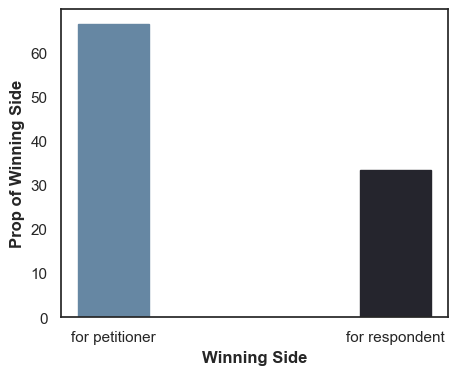

In [ ]:
simple_bar_plot(xlabel, ylabel, labs, y)

## Setup

### Package Importing

In [2]:
# Import the necessary packages
from IPython.display import Markdown
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

from supreme_court_predictions.summary_analysis.descriptive_statistics import (
    DescriptiveStatistics,
)
from supreme_court_predictions.models.logistic_regression import (
    LogisticRegression,
)
from supreme_court_predictions.models.random_forest import RandomForest
from supreme_court_predictions.models.xg_boost import XGBoost
from supreme_court_predictions.models.simulation import Simulate
from supreme_court_predictions.util.functions import get_full_data_pathway

%load_ext jupyter_black
%matplotlib inline

ModuleNotFoundError: No module named 'supreme_court_predictions.models.simulation'

### Dataset loading

In [ ]:
# Setup - Datasets
LABELS = np.array(["for respondent", "for petitioner"])

# Loading unprocessed dataframes
data_path = get_full_data_pathway("clean_convokit/")
utterances = pd.read_csv(data_path + "utterances_df.csv")
advocates = pd.read_csv(data_path + "advocates_df.csv")
cases = pd.read_csv(data_path + "cases_df.csv")
conversations = pd.read_csv(data_path + "conversations_df.csv")
speakers = pd.read_csv(data_path + "speakers_df.csv")
voters = pd.read_csv(data_path + "voters_df.csv")

# Loading processed dataframes
proc_data_path = get_full_data_pathway("processed/")
cases_proc = pd.read_pickle(proc_data_path + "case_aggregations.p")
judges_proc = pd.read_pickle(proc_data_path + "judge_aggregations.p")
adversary_proc = pd.read_pickle(proc_data_path + "adversary_aggregations.p")
advocate_proc = pd.read_pickle(proc_data_path + "advocate_aggregations.p")

# Load descriptive statistics
ds = DescriptiveStatistics()
ds.parse_all_data()

NameError: name 'get_full_data_pathway' is not defined

### Model and plot loading

In [ ]:
# Setup - Models and plots
# Load models
lr = LogisticRegression()
lr.run()

rf = RandomForest()
rf.run()

xg = XGBoost()
xg.run()

# Model Comparison DF - using advocate utterances
ADVERSARY_AGGS = "adversary_aggregations"
models = [
    "logistic regression",
    "random forest",
    "xg boost",
]
accuracy = [
    lr.accuracies[ADVERSARY_AGGS],
    rf.accuracies[ADVERSARY_AGGS],
    xg.accuracies[ADVERSARY_AGGS],
]
f1 = [
    lr.f1[ADVERSARY_AGGS],
    rf.f1[ADVERSARY_AGGS],
    xg.f1[ADVERSARY_AGGS],
]
execution_time = [
    lr.execution_times[ADVERSARY_AGGS],
    rf.execution_times[ADVERSARY_AGGS],
    xg.execution_times[ADVERSARY_AGGS],
]

model_comp = {
    "model": models,
    "accuracy": accuracy,
    "f1_score": f1,
    "execution_time": execution_time,
}
model_comp = pd.DataFrame.from_dict(model_comp)

NameError: name 'LogisticRegression' is not defined

### Helper functions

In [ ]:
# Helper Functions
def dict_to_df(column_names, dict1, dict2=None, dict3=None):
    """
    Transforms a dictionary to a dataframe for better presentation.

    :param column_names (list): List of column names for dataframe.
    :param dict1 (dictionary): Dictionary of data to convert.
    :param dict2 (dictionary, optional): Dictionary of data to convert.
    :param dict3 (dictionary, optional): Dictionary of data to convert.
    : return (DataFrame) DataFrame representation of dictionary.
    """

    df = {
        column_names[0]: list(dict1.keys()),
        column_names[1]: list(dict1.values()),
    }

    if dict2:
        df[column_names[2]] = list(dict2.values())

    if dict3:
        df[column_names[3]] = list(dict2.values())

    df = pd.DataFrame.from_dict(df)

    return df


def disp_accuracy(
    df,
    labs,
    x_label="Dataset",
    cols=["accuracy", "f1_score", "execution_time"],
    leg_labs=["Accuracy", "F1 Score", "Execution Time"],
    colors=["#577590", "#25252D", "#B8BDB3"],
):
    """
    Creates a barchart representing the accuracy and f1 scores of a dataset.

    :param df (DataFrame) Dataframe with three columns: dataset name, accuracy
                          score, and F1 score.
    """
    # Seaborn plots theme
    # sns.set_theme(style="white")

    # set width of bar
    barWidth = 0.25
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax2 = ax1.twinx()

    # set height of bar
    x1 = list(df[cols[0]])
    x2 = list(df[cols[1]])
    x3 = list(df[cols[2]])

    # Set position of bar on X axis
    br1 = np.arange(len(df))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]

    # Make the plot
    bar1 = ax1.bar(
        br1,
        x1,
        color=colors[0],
        width=barWidth,
        edgecolor=colors[0],
        label=leg_labs[0],
    )
    bar2 = ax1.bar(
        br2,
        x2,
        color=colors[1],
        width=barWidth,
        edgecolor=colors[1],
        label=leg_labs[1],
    )
    bar3 = ax2.bar(
        br3,
        x3,
        color=colors[2],
        width=barWidth,
        edgecolor=colors[2],
        label=leg_labs[2],
    )

    # Manage axes
    plt.xlabel(x_label, fontweight="bold", fontsize=15)
    ax1.set_ylabel("Prop Correct Prediction", fontweight="bold", fontsize=15)
    ax2.set_ylabel("Execution Time in Seconds", fontweight="bold", fontsize=15)
    plt.xticks(
        [r + barWidth for r in range(len(x1))],
        labs,
    )
    ax2.set_ylim([0, math.ceil(df[cols[2]].max())])

    ax1.legend([bar1, bar2, bar3], leg_labs, loc="upper left")
    plt.show()


def disp_conf_matrix(cm):
    """
    Creates a plot of the confusion matrix.

    :param cm (array): Confusion matrix to display.
    """
    # Seaborn plots theme
    sns.set_theme(style="white")

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=LABELS,
    )
    disp.plot(cmap=plt.cm.Blues)
    plt.show()


def simple_bar_plot(
    xlabel,
    ylabel,
    labs,
    y,
    num_bars=2,
    colors=["#6687A3", "#25252D"],
    barWidth=0.25,
    xticks=[0, 1],
):
    """
    Generates a simple barchart for showing tabular data

    :param xlabel (str): Label for the x-axis.
    :param ylabel (str): Label for the y-axis.
    :param labs (list): Labels for the bar chart legend.
    :param y (list): Data to display on the barchart.
    :param num_bars (int, optional): Number of elements to be displayed.
    :param colors (list, optional): Color of the elements to be displayed.
    :param barWidth (float, optional): Width of the displayed elements.
    :param xticks (list, optional): Placement of the displayed elements.
    """
    barWidth = 0.25
    _, ax = plt.subplots(figsize=(5, 4))

    br1 = np.arange(num_bars)

    # Make the plot
    ax.bar(
        br1,
        y,
        color=colors,
        width=barWidth,
        edgecolor=colors,
        label=labs,
    )

    # Manage axes
    plt.xlabel(xlabel, fontweight="bold", fontsize=12)
    ax.set_ylabel(ylabel, fontweight="bold", fontsize=12)
    plt.xticks(
        xticks,
        labs,
    )

    plt.show()

### Finetuning Functions

In [ ]:
# Value columns for long format
value_cols = [
    "case_aggregations",
    "judge_aggregations",
    "advocate_aggregations",
    "adversary_aggregations",
]


def get_long_df(
    param_name, param_values, accuracy_dicts, f1_dicts, execution_time_dicts
):
    """
    Converts the accuracy dataframes to long format for
    posterior plotting
    """
    # Dataframe of accuracy, f1 scores, and execution times
    acc_df = pd.DataFrame.from_dict(accuracy_dicts)
    f1_df = pd.DataFrame.from_dict(f1_dicts)
    et_df = pd.DataFrame.from_dict(execution_time_dicts)

    # Add parameter values to dataframe
    acc_df[param_name] = param_values
    f1_df[param_name] = param_values
    et_df[param_name] = param_values

    # Convert to long format
    acc_melted = acc_df.melt(
        id_vars=param_name, value_vars=value_cols, var_name="type"
    )
    f1_melted = f1_df.melt(
        id_vars=param_name, value_vars=value_cols, var_name="type"
    )
    et_melted = et_df.melt(
        id_vars=param_name, value_vars=value_cols, var_name="type"
    )

    return acc_melted, f1_melted, et_melted

In [ ]:
def plot_accuracy_scores(
    melted_df, param_name, model_name, accuracy_metric=None
):
    """
    Plots accuracy scores when finetuning a parameter

    Parameters
    ----------
    param_name : str
        Name of parameter being finetuned
    melted_df : pandas dataframe
        Dataframe with accuracy scores in long format
    """

    # Seaborn plots theme
    # sns.set_theme(style="darkgrid")

    fig_dims = (10, 12)
    fig, ax1 = plt.subplots(figsize=fig_dims)
    ax1 = sns.lineplot(
        x=param_name,
        y="value",
        data=melted_df,
        hue="type",
        style="type",
        markers=True,
        dashes=False,
        palette=["#2892D7", "#25252D", "#858D7C", "#FF9E1F"],
    )
    fig.set_size_inches(12.7, 9.27)
    plt.ticklabel_format(style="plain", axis="y")
    if accuracy_metric is None:
        ax1.set_title(
            f"Accuracy Score - {model_name} - {param_name} parameter finetuning (test set)",
            fontsize=18,
        )
        ax1.set_ylabel("Accuracy Score", fontsize=16)
    else:
        ax1.set_title(
            f"{accuracy_metric} Score - {model_name} - {param_name} parameter finetuning (test set)",
            fontsize=18,
        )
        ax1.set_ylabel(f"{accuracy_metric} Score", fontsize=16)

    ax1.set_xlabel(param_name, fontsize=16)
    plt.legend(bbox_to_anchor=(1.25, 1), loc="upper right", borderaxespad=0)

    plt.show()

## Results

### Summary Statistics

We partitioned our preliminary analysis into six sections, with our metrics being counts and averages.

**Advocates:** 
- For this analysis, we provided unique counts of advocates that were on the following sides: for the petitioner, for the respondent, unknown, or for amicus curiae. We also provided counts of the total unique advocates across all the cases, the unique roles that attributes can have, and a count of aggregate roles that advocates can have. We determined these aggregate roles by doing visual text analyses of a subset of the roles listed in the dataset. This led to the following aggregate roles that advocates could take: inferred, for the respondent, for the petitioner, and for amicus curiae.
- The majority of advocates worked on the side of the petitioner (approximately 39%), and the majority of the advocate roles were inferred by the dataset creator (about 37%).

**Cases:**
- For this analysis, we provided descriptives statistics of the count of cases on each win side (for the petitioner, for the respondent, unclear, or unavailable); a count of total cases; the count of courts cases span; the total number of years the cases dataset span; the total number of unique petitioners; and the total number of unique respondents.
- About 65% of cases ruled in favor of the petitioner. 

**Speakers:**
- This analysis describes the speakers present across the cases. Speakers took on 1 of 3 roles: advocates, justices, or unknown. The majority of speakers were advocates, with only 35 speakers being justices. The dataset also included approximately 8900 unique speakers.

**Voters:**
- For this analysis we counted the sum total of positive, negative, and absent votes from justices along with the total number of justices that voted over the span of 65 years (1955 to 2019).
- Within that timespan 35 justices were accounted for in the records, roughly 59% of votes were positive, 40% of votes were negative, and 1% of votes were not cast as either positive or negative. 

**Utterances:**
- For this analysis we counted the average number of utterances per case and the average number of speakers that showed up per case.
- The average number of utterances per case was approximately 253 and the average number of speakers per case was 10.

In [ ]:
# Setup - Datasets
LABELS = np.array(["for respondent", "for petitioner"])

# Loading unprocessed dataframes
data_path = get_full_data_pathway("clean_convokit/")
utterances = pd.read_csv(data_path + "utterances_df.csv")
advocates = pd.read_csv(data_path + "advocates_df.csv")
cases = pd.read_csv(data_path + "cases_df.csv")
conversations = pd.read_csv(data_path + "conversations_df.csv")
speakers = pd.read_csv(data_path + "speakers_df.csv")
voters = pd.read_csv(data_path + "voters_df.csv")

# Loading processed dataframes
proc_data_path = get_full_data_pathway("processed/")
cases_proc = pd.read_pickle(proc_data_path + "case_aggregations.p")
judges_proc = pd.read_pickle(proc_data_path + "judge_aggregations.p")
adversary_proc = pd.read_pickle(proc_data_path + "adversary_aggregations.p")
advocate_proc = pd.read_pickle(proc_data_path + "advocate_aggregations.p")

ds = DescriptiveStatistics()
ds.parse_all_data()

### Case Information
Includes infromation on each <i>court case</i>, such as:
- Unique case ID
- Year and title of case
- Case petitioner and respondent
- Winning side (1 = for petitioner) and decision date

In [ ]:
ds.cases_stats

counts  percentages
win side             for petitioner   284.0    66.510539
                     for respondent   143.0    33.489461
cases                                 427.0          NaN
courts                                  1.0          NaN
years (2014 to 2019)                    6.0          NaN
petitioners                           413.0          NaN
respondents                           356.0          NaN

### Speakers
Includes infromation on each <i>speaker</i>, such as:
- Speaker name and unique speaker key
- Speaker role and type (justice, advocate, nan)

In [ ]:
ds.speakers_stats

counts  percentages
speaker type  advocate (A)  8942.0    99.610115
              justice (J)     35.0     0.389885
speaker names               8928.0          NaN
speaker keys                8977.0          NaN

### Voters
Includes infromation on each <i>vote and voter</i>, such as:
- Unique case ID
- Voter key and vote side (judges only, 1=for petitioner)

In [ ]:
ds.voters_stats.head(7)

counts percentages
votes    for petitioner        1912.0   60.659898
         for respondent        1240.0   39.340102
justices                         11.0         NaN
justice  j__john_g_roberts_jr     363    0.661157
         j__antonin_scalia         66    0.651515
         j__anthony_m_kennedy     240    0.658333
         j__clarence_thomas       364    0.532967

### Advocates
Includes infromation on each <i>advocate (non-judges)</i>, such as:
- Unique case ID
- Advocate ID and advocacy side(1 = for petitioner)
- Advocate role

In [ ]:
ds.advocates_stats

counts  percentages
side            for petitioner   403.0    50.124378
                for respondent   401.0    49.875622
total advocates                  391.0          NaN
total roles                      154.0          NaN
aggregate roles inferred          10.0     1.243781
                for respondent   404.0    50.248756
                for petitioner   390.0    48.507463

### Conversations
Includes infromation on each <i>conversation</i>. There is one conversation per case, <br>
and conversations are made up of individual utterances. Conversation information includes:

- Unique case ID
- Unique conversation ID
- Winning side (1 = for petitioner)

In [ ]:
conversations.head(2)

,id,case_id,winning_side
0,23291,2014_13-553,1
1,23252,2014_13-895,1


### Utterances
Includes infromation on each <i>utterance</i>, such as:
- Unique case ID
- Corresponding conversation ID
- Speaker key
- Utterance text

In [ ]:
cols = ["case_id", "speaker", "speaker_type", "conversation_id", "text"]
utterances.head(2).loc[:, cols]

,case_id,speaker,speaker_type,conversation_id,text
0,2014_13-553,j__john_g_roberts_jr,J,23291,"we'll hear argument next in case no. 13-553, t..."
1,2014_13-553,andrew_l_brasher,A,23291,"thank you, mr. chief justice, and may it pleas..."


## Hypothesis

We can hypothesize that XGBoost performs the best. Logistic regression performs well with sparse high-dimensional data and often used for NLP tasks. Random Forests go one step further and capture non-linear relationships between features, which might be more useful in predicting case rulings. Without hyperparameter tuning, however, it is still possibel to overfit. 

More than these two models, however, we hypothesize that XGBoost may perform slightly better due to its flexibility in various imbalanced data. XGBoost uses gradient boost, which can help correct the errors of the ensemble. XGBoost also has a regularization parameter that is not as often used in logistic regression and random forest. With the right tuning, it is possible to guess that XGBoost could perform better. XGBoost also handles missing data well.

## Logistic Regression

**What were we able to conclude from our use of the Logistic Regression model?** \
We applied logistic regression models to four different datasets and observed the below results. We used the following hyperparameters as defaults in our regression: a test size of `0.20`, a random state of 123, and a maximum of 1000 iterations. Four datasets were used, and models based on advocate and adversary utterances achieved higher accuracies than those using judge utterances or a combination of all utterances. The logistic regression model provided insights into the predictive power of different utterances, indicating that advocate and adversary statements are more predictive than the more than judge utterances, and all utterances aggregated together for case outcomes.

**All Utterances:** This dataset comprises a bag of words created from all utterances in the cases between 2014 and 2019, including the judge, advocate, and adversary statements. The model achieved an accuracy of `54.05%`, slightly better than random chance.

**Judge Utterances:** This dataset only focuses on a bag of words from judge statements. The model's accuracy was `52.05%`, underperforming compared to the model using all utterances.

**Advocate Utterances:** Using a bag of words created solely from advocate statements, the model achieved an accuracy of `75.67%`, significantly outperforming the model using all utterances.

**Adversary Utterances:** This dataset consists of a bag of words derived only from adversary statements. The model obtained an accuracy of `78.37%`, outperforming all other models and emerging as the best performer.

In conclusion, models using advocate and adversary utterances independently have higher predictive power than models using judge utterances or a combination of all utterances.

### Default Parameters
- **Maximum number of features**: 5000
- **Maximum number of iterations**: 1000
- **Test size**: 0.20

In [ ]:
# Code that runs the Logistic Regression model and creates visuals

## Random Forest

**What were we able to conclude from our use of the Random Forest model?** \
We picked the Random Forest model because we needed to capture the complex interactions among different words in unstructured data, to avoid overfitting our model by training on multiple decision trees, and to rank the importance of different words on the predicted outcome. We can confirm the model's accuracy by predicting case outcomes from the results, which gives us a view of each unique word's importance. If we were to use this model for cross-validation, or out-of-sample data, we could also see how well the model generalizes and avoids overfitting.

In [ ]:
# Code that runs the Random Forest model and creates visuals

## XGBoost

**What were we able to conclude from our use of the XG Boost model?** 

A crucial insight is that ensemble models tend to perform better than 'single' models. In this case, XGBoost uses several decision trees to make the final prediction while adjusting the model on every iteration. This allows the model to learn from its mistakes and improve on every iteration, which leads to a better overall performance.

On the other hand, however, ease of interpretation is lost, and a lengthy finetuning process is necessary to get the best set of hyperparameters for our context.

<!-- Can print out IDs of which ones are misclassified. Point out /trace back to the data.  -->

### Hyperparameter Tuning

In [ ]:
# Baseline Parameters
eta = 0.3
subsample = 1
max_depth = 7
n_estimators = 100


# Create an array of different values to test
eta_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
subsample_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


# Columns
value_cols = [
    "case_aggregations",
    "judge_aggregations",
    "advocate_aggregations",
    "adversary_aggregations",
]

#### Functions

In [ ]:
def get_long_df(param_name, param_values, accuracy_dicts, f1_dicts):
    """
    Converts the accuracy dataframes to long format for
    posterior plotting
    """
    # Dataframe of accuracy and f1 scores
    acc_df = pd.DataFrame.from_dict(accuracy_dicts)
    f1_df = pd.DataFrame.from_dict(f1_dicts)

    # Add parameter values to dataframe
    acc_df[param_name] = param_values
    f1_df[param_name] = param_values

    # Convert to long format
    acc_melted = acc_df.melt(
        id_vars=param_name, value_vars=value_cols, var_name="type"
    )
    f1_melted = f1_df.melt(
        id_vars=param_name, value_vars=value_cols, var_name="type"
    )

    return acc_melted, f1_melted

In [ ]:
def plot_accuracy_scores(melted_df, param_name, accuracy_metric=None):
    """
    Plots accuracy scores when finetuning a parameter

    Parameters
    ----------
    param_name : str
        Name of parameter being fine-tuned
    melted_df : pandas dataframe
        Dataframe with accuracy scores in long format
    """
    fig_dims = (10, 12)
    fig, ax1 = plt.subplots(figsize=fig_dims)
    ax1 = sns.lineplot(
        x=param_name,
        y="value",
        data=melted_df,
        hue="type",
        style="type",
        markers=True,
        dashes=False,
    )
    fig.set_size_inches(12.7, 9.27)
    plt.ticklabel_format(style="plain", axis="y")
    if accuracy_metric is None:
        ax1.set_title(
            f"Accuracy Score - {param_name} parameter finetuning (test set)",
            fontsize=18,
        )
        ax1.set_ylabel("Accuracy Score", fontsize=16)
    else:
        ax1.set_title(
            f"{accuracy_metric} Score - {param_name} parameter finetuning (test set)",
            fontsize=18,
        )
        ax1.set_ylabel(f"{accuracy_metric} Score", fontsize=16)

    ax1.set_xlabel(param_name, fontsize=16)
    plt.legend(bbox_to_anchor=(1.25, 1), loc="upper right", borderaxespad=0)

    plt.show()

In [ ]:
# Run baseline model
xgboost_model = XGBoost(debug_mode=True)
xgboost_model.run()

Creating bag of words
Starting the XGBoost model
------------------------------------------
Running a gradient boosted tree model on case_aggregations...
Accuracy score: 0.5675675675675675
F1 score: 0.68
------------------------------------------
Creating bag of words
Starting the XGBoost model
------------------------------------------
Running a gradient boosted tree model on judge_aggregations...
Accuracy score: 0.547945205479452
F1 score: 0.6972477064220183
------------------------------------------
Creating bag of words
Starting the XGBoost model
------------------------------------------
Running a gradient boosted tree model on advocate_aggregations...
Accuracy score: 0.8108108108108109
F1 score: 0.8600000000000001
------------------------------------------
Creating bag of words
Starting the XGBoost model
------------------------------------------
Running a gradient boosted tree model on adversary_aggregations...
Accuracy score: 0.8243243243243243
F1 score: 0.8631578947368421
----

({'case_aggregations': 0.5675675675675675,
  'judge_aggregations': 0.547945205479452,
  'advocate_aggregations': 0.8108108108108109,
  'adversary_aggregations': 0.8243243243243243},
 {'case_aggregations': 0.68,
  'judge_aggregations': 0.6972477064220183,
  'advocate_aggregations': 0.8600000000000001,
  'adversary_aggregations': 0.8631578947368421},
 {'case_aggregations': array([[ 8, 19],
         [13, 34]], dtype=int64),
  'judge_aggregations': array([[ 2, 24],
         [ 9, 38]], dtype=int64),
  'advocate_aggregations': array([[17, 10],
         [ 4, 43]], dtype=int64),
  'adversary_aggregations': array([[20,  7],
         [ 6, 41]], dtype=int64)})

#### Simulation 

This portion of the project predicts, through all three models of LR, Random Forest, and XG Boost, the decision of each judge. And then, based on majority vote, it predicts majority decision. As required in the project, duplicate utterances are flattened and combined into one list of utterance tokens. 

In [ ]:
Simulate()

NameError: name 'Simulate' is not defined

#### Learning Rate (Eta) Finetuning

In [ ]:
accuracy_dicts = []
f1_dicts = []
confusion_matrix_dicts = []

for eta_value in eta_values:
    print(f"Testing eta value: {eta_value}")
    xgboost_model = XGBoost(debug_mode=False, eta=eta_value)
    xgboost_model.run()

    accuracy_dicts.append(xgboost_model.accuracies)
    f1_dicts.append(xgboost_model.f1)

eta_melted, eta_f1_melted = get_long_df(
    "eta", eta_values, accuracy_dicts, f1_dicts
)

Testing eta value: 0.1
Testing eta value: 0.2
Testing eta value: 0.3
Testing eta value: 0.4
Testing eta value: 0.5
Testing eta value: 0.6
Testing eta value: 0.7
Testing eta value: 0.8
Testing eta value: 0.9
Testing eta value: 1


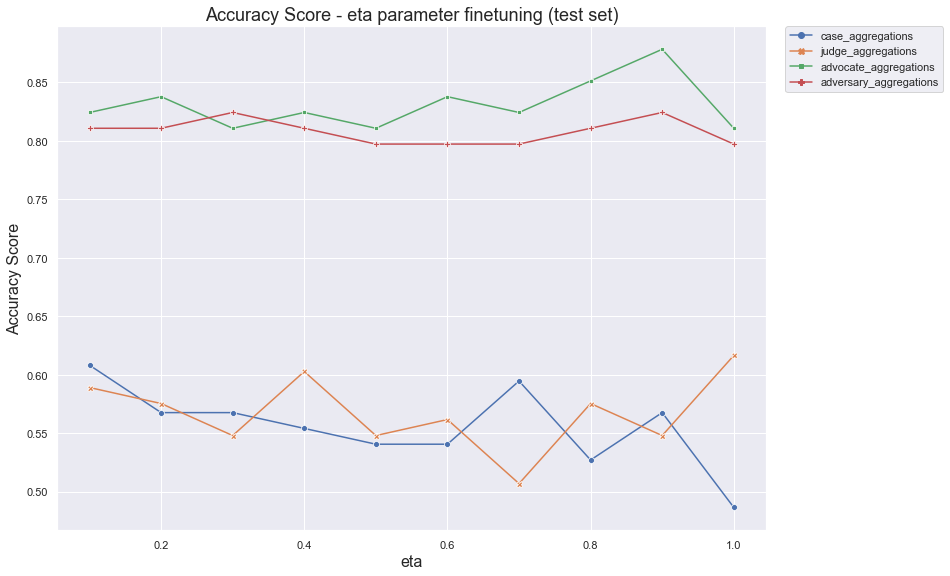

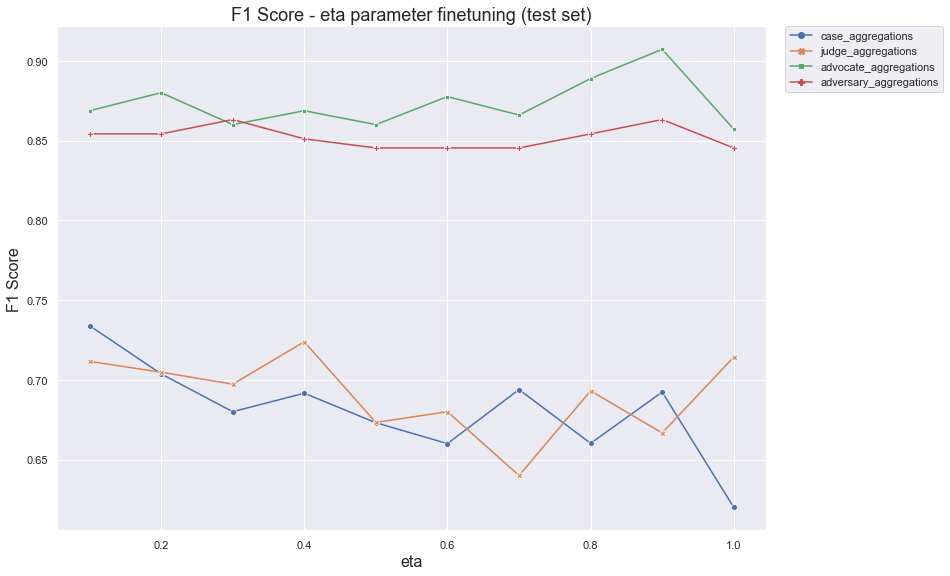

In [ ]:
# Plot accuracy scores
plot_accuracy_scores(eta_melted, "eta")
plot_accuracy_scores(eta_f1_melted, "eta", accuracy_metric="F1")

##### Max Depth Finetuning

In [ ]:
accuracy_dicts = []
f1_dicts = []
confusion_matrix_dicts = []

for max_depth_value in max_depth_values:
    print(f"Testing max depth value: {max_depth_value}")
    xgboost_model = XGBoost(debug_mode=False, max_depth=max_depth_value)
    xgboost_model.run()

    accuracy_dicts.append(xgboost_model.accuracies)
    f1_dicts.append(xgboost_model.f1)

max_depth_melted, max_depth_f1_melted = get_long_df(
    "Max Tree Depth", max_depth_values, accuracy_dicts, f1_dicts
)

Testing max depth value: 1
Testing max depth value: 2
Testing max depth value: 3
Testing max depth value: 4
Testing max depth value: 5
Testing max depth value: 6
Testing max depth value: 7
Testing max depth value: 8
Testing max depth value: 9
Testing max depth value: 10


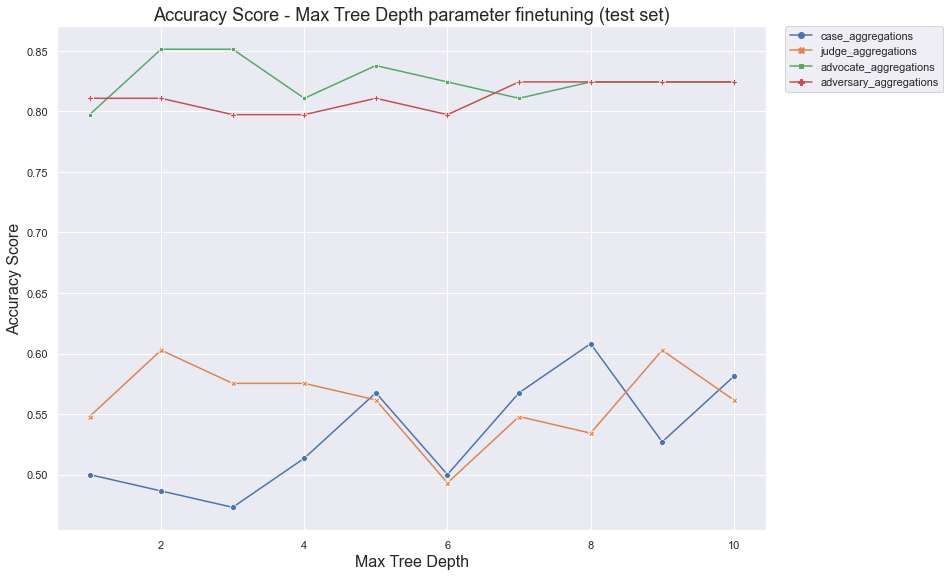

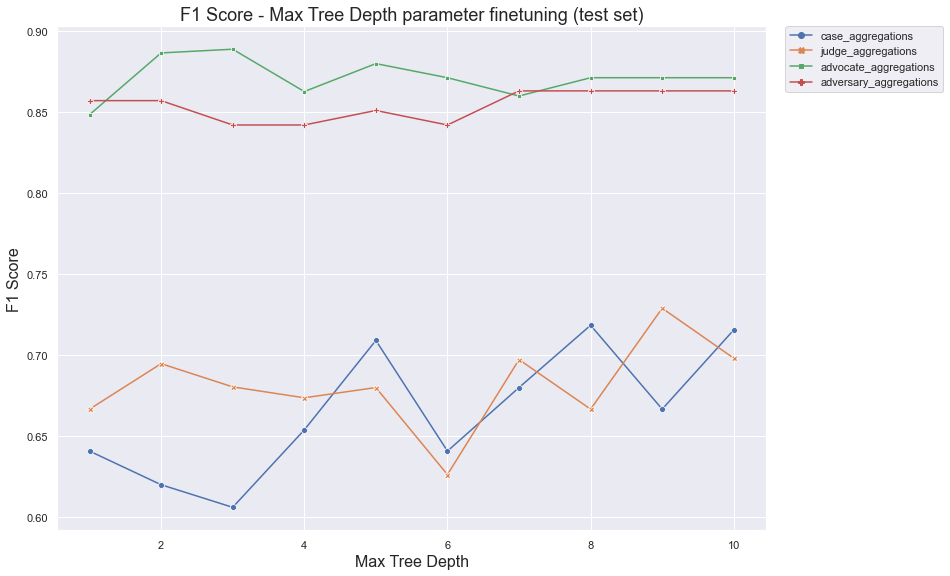

In [ ]:
# Plot accuracy scores
plot_accuracy_scores(max_depth_melted, "Max Tree Depth")
plot_accuracy_scores(
    max_depth_f1_melted, "Max Tree Depth", accuracy_metric="F1"
)

### Subsampling Finetuning

In [ ]:
accuracy_dicts = []
f1_dicts = []
confusion_matrix_dicts = []

for subsample_value in subsample_values:
    print(f"Testing subsampling value: {subsample_value}")
    xgboost_model = XGBoost(debug_mode=False, subsample=subsample_value)
    xgboost_model.run()

    accuracy_dicts.append(xgboost_model.accuracies)
    f1_dicts.append(xgboost_model.f1)

subsample_melted, subsample_f1_melted = get_long_df(
    "Subsample Value", subsample_values, accuracy_dicts, f1_dicts
)

Testing subsampling value: 0.1
Testing subsampling value: 0.2
Testing subsampling value: 0.3
Testing subsampling value: 0.4
Testing subsampling value: 0.5
Testing subsampling value: 0.6
Testing subsampling value: 0.7
Testing subsampling value: 0.8
Testing subsampling value: 0.9
Testing subsampling value: 1


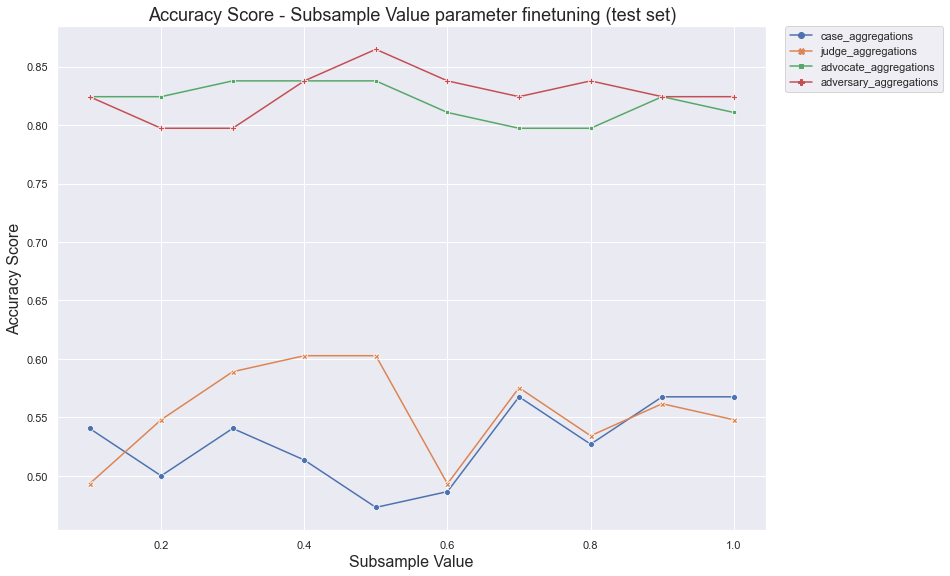

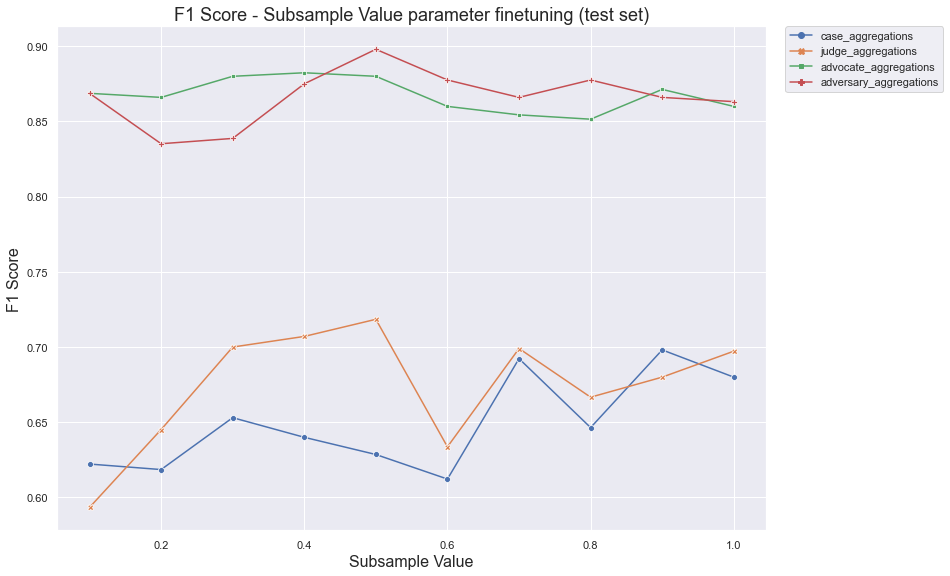

In [ ]:
# Plot accuracy scores
plot_accuracy_scores(subsample_melted, "Subsample Value")
plot_accuracy_scores(
    subsample_f1_melted, "Subsample Value", accuracy_metric="F1"
)

## Summation

**What model worked best for predicting case results based on utterances?**
[2-3 sentences]

**How performant were each of the models (time, processing power, etc.)?**
[2-3 sentences]

**If our constraints are time and computing power, which of the three models would be the best to implement?**
[2-3 sentences]

**What was a notable technical lesson you learned while creating this project?**

**Federico:** \
I was surprised that we were able to get good results by using bag of words. It was very interesting to see how such a complex task involving language could be solved by using this approach. I also got to see how hyperparameter tuning can make a huge difference in the model's performance, but there are so many possibilities that one should still have some knowledge on which parameters to change and how.

I also learned how ensemble models can be very powerful, but also very hard to interpret. I think this is a tradeoff that one should consider when choosing a model for a specific task.

**Jessup:** \
Compared to manually programming each machine learning model, I learned that using sklearn is drastically easier. This frees up a lot of time to work on optimizing the model through hyperparameters and picking amongst many available models to best fit the different kind of data we are training on. 

**Chanteria:**

**Michael:**